This project will look at how the length of girls' names in the US has changed over time, and how it varies by region. This information could be useful to people studying our society who might be able to find different influences that correlate with these changes. For example, if there is a distinct change that could be explained by a large increase in immigration. There are also cultural things that can be learned about each region.

The first step is to import any libraries that we might need.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.simplefilter('ignore')

Now that we have imported pandas, we can read in the datasets. One looks at national statistics, and one breaks the information down by state. We can check the info of both to see what columns we have, and the heads to see what the results look like.

In [2]:
statenames = pd.read_csv('StateNames.csv')
statenames.info()
statenames.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647426 entries, 0 to 5647425
Data columns (total 6 columns):
Id        int64
Name      object
Year      int64
Gender    object
State     object
Count     int64
dtypes: int64(3), object(3)
memory usage: 258.5+ MB


,Id,Name,Year,Gender,State,Count
0,1,Mary,1910,F,AK,14
1,2,Annie,1910,F,AK,12
2,3,Anna,1910,F,AK,10
3,4,Margaret,1910,F,AK,8
4,5,Helen,1910,F,AK,7


In [3]:
nationalnames = pd.read_csv('NationalNames.csv')
nationalnames.info()
nationalnames.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825433 entries, 0 to 1825432
Data columns (total 5 columns):
Id        int64
Name      object
Year      int64
Gender    object
Count     int64
dtypes: int64(3), object(2)
memory usage: 69.6+ MB


,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746


Next, we must make new dataframes that only include girls' names. We can check the info to see that the number of entries in are being cut in about half.

In [4]:
f_state = statenames[statenames['Gender']=='F']
f_state.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3154009 entries, 0 to 5634123
Data columns (total 6 columns):
Id        int64
Name      object
Year      int64
Gender    object
State     object
Count     int64
dtypes: int64(3), object(3)
memory usage: 168.4+ MB


In [5]:
f_national = nationalnames[nationalnames['Gender']=='F']
f_national.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1081683 entries, 0 to 1811455
Data columns (total 5 columns):
Id        1081683 non-null int64
Name      1081683 non-null object
Year      1081683 non-null int64
Gender    1081683 non-null object
Count     1081683 non-null int64
dtypes: int64(3), object(2)
memory usage: 49.5+ MB


Let's add the column that measures the length of each name.

In [6]:
f_national['Length'] = f_national['Name'].str.len()
f_state['Length'] = f_state['Name'].str.len()

f_national.head()

,Id,Name,Year,Gender,Count,Length
0,1,Mary,1880,F,7065,4
1,2,Anna,1880,F,2604,4
2,3,Emma,1880,F,2003,4
3,4,Elizabeth,1880,F,1939,9
4,5,Minnie,1880,F,1746,6


Now we can break down our national dataset into different time spans. We are going to look at the 1900s in periods of 20 years.

In [7]:
time1 = f_national[(f_national['Year']>1899) & (f_national['Year']<1920)]
time2 = f_national[(f_national['Year']>1919) & (f_national['Year']<1940)]
time3 = f_national[(f_national['Year']>1939) & (f_national['Year']<1960)]
time4 = f_national[(f_national['Year']>1959) & (f_national['Year']<1980)]
time5 = f_national[(f_national['Year']>1979) & (f_national['Year']<2000)]

The null hypothesis is that each consecutive time period is from the same distribution. I hypothesize that each consecutive time period has a different distribution than the previous.

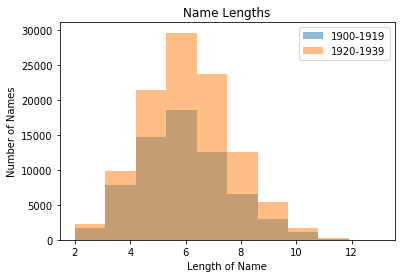

In [8]:
plt.hist(time1['Length'], alpha = .5, label = '1900-1919')
plt.hist(time2['Length'], alpha = .5, label = '1920-1939')
plt.title('Name Lengths')
plt.xlabel('Length of Name')
plt.ylabel('Number of Names')
plt.legend(loc='upper right');

In [9]:
print(stats.describe(time1['Length']))
print(stats.describe(time2['Length']))

DescribeResult(nobs=65899, minmax=(2, 13), mean=6.055144994612968, variance=2.226981138874874, skewness=0.3497937626786011, kurtosis=0.016219180681165568)
DescribeResult(nobs=106540, minmax=(2, 13), mean=6.235535948939366, variance=2.1694915561185626, skewness=0.23804833795386499, kurtosis=-0.03338473053882218)


From looking at the histogram and the stats, we can conclude that both sets are sufficiently normal to perform a t-test.

In [10]:
stats.ttest_ind(time1['Length'], time2['Length'])

Ttest_indResult(statistic=-24.588148880984622, pvalue=2.8748996764504384e-133)

Because our pvalue < .05, we reject the null hypothesis and conclude that the distribution of name lengths from 1900-1919 is different from the distribution of name lengths from 1920-1939.

We will now repeat this task for the other consecutive time periods.

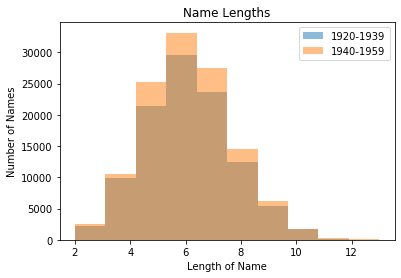

In [11]:
plt.hist(time2['Length'], alpha = .5, label = '1920-1939')
plt.hist(time3['Length'], alpha = .5, label = '1940-1959')
plt.title('Name Lengths')
plt.xlabel('Length of Name')
plt.ylabel('Number of Names')
plt.legend(loc='upper right');

In [12]:
print(stats.describe(time2['Length']))
print(stats.describe(time3['Length']))

DescribeResult(nobs=106540, minmax=(2, 13), mean=6.235535948939366, variance=2.1694915561185626, skewness=0.23804833795386499, kurtosis=-0.03338473053882218)
DescribeResult(nobs=121895, minmax=(2, 13), mean=6.242979613601871, variance=2.1703236402475907, skewness=0.24805956670626164, kurtosis=0.04619476769463082)


In [13]:
stats.ttest_ind(time2['Length'], time3['Length'])

Ttest_indResult(statistic=-1.2048454731334637, pvalue=0.22826420983719842)

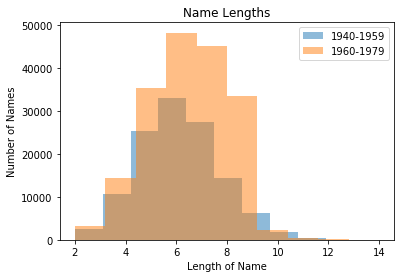

In [14]:
plt.hist(time3['Length'], alpha = .5, label = '1940-1959')
plt.hist(time4['Length'], alpha = .5, label = '1960-1979')
plt.title('Name Lengths')
plt.xlabel('Length of Name')
plt.ylabel('Number of Names')
plt.legend(loc='upper right');

In [15]:
print(stats.describe(time3['Length']))
print(stats.describe(time4['Length']))

DescribeResult(nobs=121895, minmax=(2, 13), mean=6.242979613601871, variance=2.1703236402475907, skewness=0.24805956670626164, kurtosis=0.04619476769463082)
DescribeResult(nobs=182726, minmax=(2, 14), mean=6.325246544005779, variance=2.091215064403844, skewness=0.18385244415646185, kurtosis=0.1222517293352201)


In [16]:
stats.ttest_ind(time3['Length'], time4['Length'])

Ttest_indResult(statistic=-15.267809662128435, pvalue=1.3107380511491208e-52)

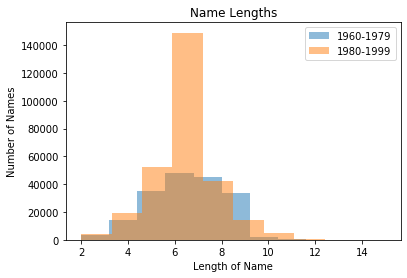

In [17]:
plt.hist(time4['Length'], alpha = .5, label = '1960-1979')
plt.hist(time5['Length'], alpha = .5, label = '1980-1999')
plt.title('Name Lengths')
plt.xlabel('Length of Name')
plt.ylabel('Number of Names')
plt.legend(loc='upper right');

In [18]:
print(stats.describe(time4['Length']))
print(stats.describe(time5['Length']))

DescribeResult(nobs=182726, minmax=(2, 14), mean=6.325246544005779, variance=2.091215064403844, skewness=0.18385244415646185, kurtosis=0.1222517293352201)
DescribeResult(nobs=287043, minmax=(2, 15), mean=6.413850886452552, variance=2.105491223046251, skewness=0.2415767958560376, kurtosis=0.5881709159201578)


In [19]:
stats.ttest_ind(time4['Length'], time5['Length'])

Ttest_indResult(statistic=-20.43069888988429, pvalue=9.79219736140237e-93)

The only pvalue>.05 is between 1920-1939 and 1940-1959. That means that we cannot reject the null hypothesis that these two periods have different distributions.

We reject the null hypothesis for all other consecutive time periods.

With the length of names appearing to change over time, we can now look at one time period to see how name length varies by region. We will look at 1980-1999 because it is the most recent 20 year window we can look at. I did not want to use an earlier period before the US had 50 states. I broke the states into regions that the US census bureau provided.

In [20]:
Northeast = ['ME', 'NH', 'VT', 'MA', 'NY', 'NJ', 'PA', 'CT', 'RI']
Midwest = ['OH', 'MI', 'IN', 'WI', 'IL', 'MN', 'IA', 'MO', 'ND', 'SD', 'NE', 'KS']
South = ['DE', 'MD', 'VA', 'WV', 'KY', 'NC', 'SC', 'TE', 'GA', 'FL', 'AL', 'MS', 'AR', 'LA', 'TX', 'OK', 'DC']
West = ['MT', 'ID', 'WY', 'CO', 'NM', 'AZ', 'UT', 'NV', 'CA', 'OR', 'WA', 'AK', 'HI']

Here we can create a column called 'Region' to assign a region to each state.

In [21]:
f_state['Region'] = f_state['State'].apply(lambda x: 'West' if x in West else ('Midwest' if x in Midwest else ('South' if x in South else 'Northeast')))
f_state.head()


,Id,Name,Year,Gender,State,Count,Length,Region
0,1,Mary,1910,F,AK,14,4,West
1,2,Annie,1910,F,AK,12,5,West
2,3,Anna,1910,F,AK,10,4,West
3,4,Margaret,1910,F,AK,8,8,West
4,5,Helen,1910,F,AK,7,5,West


We can again divide this into the 20 year period that we want to test, and then by region.

In [22]:
time = f_state[(f_state['Year']>1979) & (f_state['Year']<2000)]

In [23]:
northeast = time[(time['Region']=='Northeast')]
midwest = time[(time['Region']=='Midwest')]
south = time[(time['Region']=='South')]
west = time[(time['Region']=='West')]

The null hypothesis is that name length from 1980-1999 did not vary by region. The alternate hypothesis is that each region has a statistically significant distribution. I would especially expect the South to appear different and have more longer names because they are known for putting two names together as one first name.

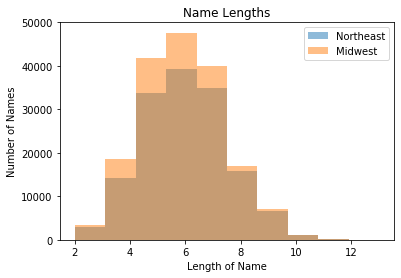

In [24]:
plt.hist(northeast['Length'], alpha = .5, label = 'Northeast')
plt.hist(midwest['Length'], alpha = .5, label = 'Midwest')
plt.title('Name Lengths')
plt.xlabel('Length of Name')
plt.ylabel('Number of Names')
plt.legend(loc='upper right');

In [25]:
print(stats.describe(northeast['Length']))
print(stats.describe(midwest['Length']))

DescribeResult(nobs=148502, minmax=(2, 13), mean=6.134853402647776, variance=1.9587304176980331, skewness=0.19010562003558606, kurtosis=-0.19077983289800748)
DescribeResult(nobs=176680, minmax=(2, 13), mean=6.063266923251075, variance=1.91567080599222, skewness=0.21963303349568314, kurtosis=-0.1737440441330449)


In [26]:
stats.ttest_ind(northeast['Length'], midwest['Length'])

Ttest_indResult(statistic=14.616706593270461, pvalue=2.27697971659696e-48)

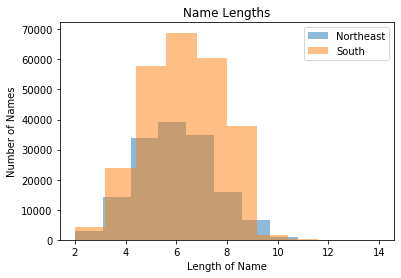

In [27]:
plt.hist(northeast['Length'], alpha = .5, label = 'Northeast')
plt.hist(south['Length'], alpha = .5, label = 'South')
plt.title('Name Lengths')
plt.xlabel('Length of Name')
plt.ylabel('Number of Names')
plt.legend(loc='upper right');

In [28]:
print(stats.describe(northeast['Length']))
print(stats.describe(south['Length']))

DescribeResult(nobs=148502, minmax=(2, 13), mean=6.134853402647776, variance=1.9587304176980331, skewness=0.19010562003558606, kurtosis=-0.19077983289800748)
DescribeResult(nobs=255313, minmax=(2, 14), mean=6.138755175020465, variance=1.9029910821650566, skewness=0.18334032222450933, kurtosis=-0.16114589293743808)


In [29]:
stats.ttest_ind(northeast['Length'], south['Length'])

Ttest_indResult(statistic=-0.8620420717450121, pvalue=0.38866487857661525)

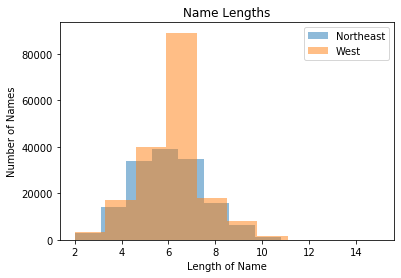

In [30]:
plt.hist(northeast['Length'], alpha = .5, label = 'Northeast')
plt.hist(west['Length'], alpha = .5, label = 'West')
plt.title('Name Lengths')
plt.xlabel('Length of Name')
plt.ylabel('Number of Names')
plt.legend(loc='upper right');

In [31]:
print(stats.describe(northeast['Length']))
print(stats.describe(west['Length']))

DescribeResult(nobs=148502, minmax=(2, 13), mean=6.134853402647776, variance=1.9587304176980331, skewness=0.19010562003558606, kurtosis=-0.19077983289800748)
DescribeResult(nobs=177030, minmax=(2, 15), mean=6.142348754448399, variance=1.9984229215998537, skewness=0.2632636713862051, kurtosis=0.16485764835618388)


In [32]:
stats.ttest_ind(northeast['Length'], west['Length'])

Ttest_indResult(statistic=-1.5136223312840116, pvalue=0.130122624815668)

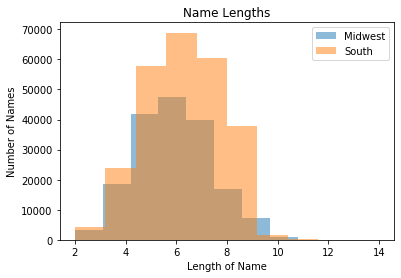

In [33]:
plt.hist(midwest['Length'], alpha = .5, label = 'Midwest')
plt.hist(south['Length'], alpha = .5, label = 'South')
plt.title('Name Lengths')
plt.xlabel('Length of Name')
plt.ylabel('Number of Names')
plt.legend(loc='upper right');

In [34]:
print(stats.describe(midwest['Length']))
print(stats.describe(south['Length']))

DescribeResult(nobs=176680, minmax=(2, 13), mean=6.063266923251075, variance=1.91567080599222, skewness=0.21963303349568314, kurtosis=-0.1737440441330449)
DescribeResult(nobs=255313, minmax=(2, 14), mean=6.138755175020465, variance=1.9029910821650566, skewness=0.18334032222450933, kurtosis=-0.16114589293743808)


In [35]:
stats.ttest_ind(midwest['Length'], south['Length'])

Ttest_indResult(statistic=-17.658826994265667, pvalue=9.209819597755679e-70)

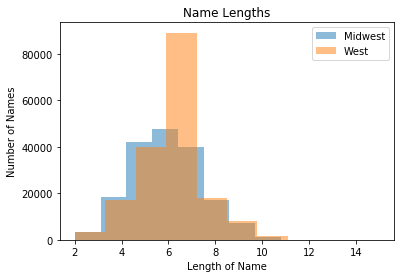

In [36]:
plt.hist(midwest['Length'], alpha = .5, label = 'Midwest')
plt.hist(west['Length'], alpha = .5, label = 'West')
plt.title('Name Lengths')
plt.xlabel('Length of Name')
plt.ylabel('Number of Names')
plt.legend(loc='upper right');

In [37]:
print(stats.describe(midwest['Length']))
print(stats.describe(west['Length']))

DescribeResult(nobs=176680, minmax=(2, 13), mean=6.063266923251075, variance=1.91567080599222, skewness=0.21963303349568314, kurtosis=-0.1737440441330449)
DescribeResult(nobs=177030, minmax=(2, 15), mean=6.142348754448399, variance=1.9984229215998537, skewness=0.2632636713862051, kurtosis=0.16485764835618388)


In [38]:
stats.ttest_ind(midwest['Length'], west['Length'])

Ttest_indResult(statistic=-16.8098958435977, pvalue=2.1860557826370196e-63)

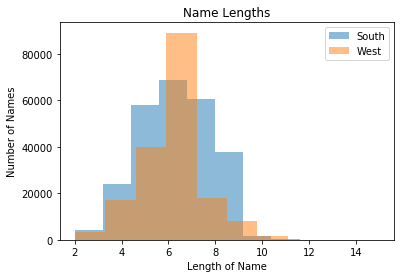

In [39]:
plt.hist(south['Length'], alpha = .5, label = 'South')
plt.hist(west['Length'], alpha = .5, label = 'West')
plt.title('Name Lengths')
plt.xlabel('Length of Name')
plt.ylabel('Number of Names')
plt.legend(loc='upper right');

In [40]:
print(stats.describe(south['Length']))
print(stats.describe(west['Length']))

DescribeResult(nobs=255313, minmax=(2, 14), mean=6.138755175020465, variance=1.9029910821650566, skewness=0.18334032222450933, kurtosis=-0.16114589293743808)
DescribeResult(nobs=177030, minmax=(2, 15), mean=6.142348754448399, variance=1.9984229215998537, skewness=0.2632636713862051, kurtosis=0.16485764835618388)


In [41]:
stats.ttest_ind(south['Length'], west['Length'])

Ttest_indResult(statistic=-0.8337595205258582, pvalue=0.40441697076953986)

We reject the null hypothesis for every test with the Midwest, and fail to reject it between every other region. This means that only the Midwest has significantly different name lengths for girls than other regions.